Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [3]:
##############################################
# make a function instead to read all 3 lists
#############################################
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
engagements = read_csv('daily-engagement-full.csv')
submissions = read_csv('project-submissions.csv')

print (enrollments[0], '\n')
print (engagements[0], '\n')
print (submissions[0], '\n')
print('DONE!')

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')]) 

OrderedDict([('utc_date', '2014-11-05'), ('acct', '448'), ('registration_date', '2014-08-05'), ('subscription_start', '2014-11-05'), ('course_key', 'ud359-nd'), ('sibling_key', 'ud359'), ('course_title', 'Intro to Data Science'), ('has_visited', '0.0'), ('total_minutes_visited', '0.0'), ('lessons_completed', '0.0'), ('projects_completed', '0.0'), ('account_key', '2257038596')]) 

OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')]) 

DONE!


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
# Clean up the data types in the engagement table
for engagement_record in engagements:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['has_visited'] = int(float(engagement_record['has_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
engagements[0]


OrderedDict([('utc_date', datetime.datetime(2014, 11, 5, 0, 0)),
             ('acct', '448'),
             ('registration_date', '2014-08-05'),
             ('subscription_start', '2014-11-05'),
             ('course_key', 'ud359-nd'),
             ('sibling_key', 'ud359'),
             ('course_title', 'Intro to Data Science'),
             ('has_visited', 0),
             ('total_minutes_visited', 0.0),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '2257038596')])

In [6]:
# Clean up the data types in the submissions table
for submission in submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

submissions[0]


OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [7]:
'''
fixing data element
'''
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

print('DONE!')

DONE!


Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
'''
questions to answer from data
1. How long is the average project submission?
2. How long to pass a class on average?
3. How long to get distinction on a project?
4. How time spent relates to number of projects?
5. How many times does a student submit a project before passing on average?
'''

'\nquestions to answer from data\n1. How long is the average project submission?\n2. How long to pass a class on average?\n3. How long to get distinction on a project?\n4. How time spent relates to number of projects?\n5. How many times does a student submit a project before passing on average?\n'

In [9]:
len(enrollments)

1640

In [10]:
unique_enrolled_students = get_unique_students(enrollments)

In [11]:
len(unique_enrolled_students)

1302

In [12]:
len(engagements)

2309239

In [13]:
unique_engagement_students = get_unique_students(engagements)

In [14]:
len(unique_engagement_students)

1237

In [15]:
len(submissions)

3642

In [16]:
unique_project_submitters = get_unique_students(submissions)

In [17]:
len(unique_project_submitters)

743

In [18]:
engagements[0]

OrderedDict([('utc_date', datetime.datetime(2014, 11, 5, 0, 0)),
             ('acct', '448'),
             ('registration_date', '2014-08-05'),
             ('subscription_start', '2014-11-05'),
             ('course_key', 'ud359-nd'),
             ('sibling_key', 'ud359'),
             ('course_title', 'Intro to Data Science'),
             ('has_visited', 0),
             ('total_minutes_visited', 0.0),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '2257038596')])

In [19]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.


len(unique_enrolled_students)


1302

## Problems in the Data

In [20]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

In [21]:
'''
fix the account_key and acct column
'''
for engagement_record in engagements:
        engagement_record['account_key'] = engagement_record['acct']
        del[engagement_record['acct']]
        
    
engagements[0]

OrderedDict([('utc_date', datetime.datetime(2014, 11, 5, 0, 0)),
             ('registration_date', '2014-08-05'),
             ('subscription_start', '2014-11-05'),
             ('course_key', 'ud359-nd'),
             ('sibling_key', 'ud359'),
             ('course_title', 'Intro to Data Science'),
             ('has_visited', 0),
             ('total_minutes_visited', 0.0),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '448')])

## Missing Engagement Records

In [22]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break
  

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


## Checking for More Problem Records

In [23]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_prob_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
        and enrollment['join_date'] != enrollment['cancel_date']:
        num_prob_students += 1
        
num_prob_students

1548

## Tracking Down the Remaining Problems

In [24]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [25]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [26]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(engagements)
non_udacity_submissions = remove_udacity_accounts(submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
2299629
3634


## Refining the Question

In [27]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [28]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [29]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#paid_engagement_in_first_week = 

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))


1293
2281112
3618


In [30]:
'''
creating new field called has visited
'''
for engagement_record in paid_engagement:
    if engagement_record['has_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [31]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
    
len(paid_engagement_in_first_week)

113273

## Exploring Student Engagement

In [32]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [33]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [34]:
import numpy as np
import statistics as stat


# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
mu = stat.mean(total_minutes)
std = stat.stdev(total_minutes)
print('Mean:', mu)
print('Standard deviation:', std)
print('Minimum:', min(total_minutes))
print('Maximum:', max(total_minutes))

Mean: 306.7083267534287
Standard deviation: 413.2046261213701
Minimum: 0.0
Maximum: 3564.73326449893


## Debugging Data Analysis Code

In [35]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.73326449893

In [36]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('registration_date', '2014-02-02'), ('subscription_start', '2015-07-09'), ('course_key', 'ud507-nd'), ('sibling_key', 'ud507'), ('course_title', 'Data Visualization and D3.js'), ('has_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('registration_date', '2014-02-02'), ('subscription_start', '2015-07-09'), ('course_key', 'ud359-nd'), ('sibling_key', 'ud359'), ('course_title', 'Intro to Data Science'), ('has_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('registration_date', '2014-02-02'), ('subscription_start', '2015-07-09'), ('course_key', 'ud032-nd'), ('sibling_key', 'ud032'), ('course_title', 'Data Wrangling with MongoDB'), ('has_visited', 0),

## Lessons Completed in First Week

In [37]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
        

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
    

In [38]:
def sum_group_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
        
    return summed_data

total_minutes_by_account = sum_group_items(engagement_by_account, 'total_minutes_visited')


In [39]:
import statistics as stat

def describe_data(data): 
    print('Mean:', stat.mean(data))
    print('Standard deviation:', stat.stdev(data))
    print('Minimum:', min(data))
    print('Maximum:', max(data))
          
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 306.7083267534287
Standard deviation: 413.2046261213701
Minimum: 0.0
Maximum: 3564.73326449893


In [40]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

lessons_completed_by_account = sum_group_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())


Mean: 1.636180904522613
Standard deviation: 3.0040712628616673
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [41]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account = sum_group_items(engagement_by_account, 'has_visited')

describe_data(days_visited_by_account.values())


Mean: 3.978894472361809
Standard deviation: 3.593051194351534
Minimum: 0
Maximum: 25


## Splitting out Passing Students

In [42]:
subway_project_lesson_keys = ['746169184', '3176718735']


pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
     
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project) 

647

In [43]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.


passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print(len(passing_engagement))
print(len(non_passing_engagement))


73263
40010


## Comparing the Two Student Groups

In [44]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


passing_engagement_by_account = group_data(passing_engagement, 'account_key')

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print('non-passing Students:  Minutes spent')
non_passing_minutes = sum_group_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())



non-passing Students:  Minutes spent
Mean: 143.32647426676493
Standard deviation: 269.9267237755391
Minimum: 0.0
Maximum: 1768.52274933203


In [45]:
print('passing Students:  Minutes Spent')
passing_minutes = sum_group_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())


passing Students:  Minutes Spent
Mean: 394.5860464835044
Standard deviation: 448.84652094077865
Minimum: 0.0
Maximum: 3564.73326449893


In [46]:
print('non-passing Students:  Lessons Completed in a Week')
non_passing_lessons = sum_group_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

non-passing Students:  Lessons Completed in a Week
Mean: 0.8620689655172413
Standard deviation: 2.55283044040882
Minimum: 0
Maximum: 27


In [47]:
print('passing Students:  Lessons Completed in a Week')
passing_lessons = sum_group_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

passing Students:  Lessons Completed in a Week
Mean: 2.052550231839258
Standard deviation: 3.144658179388869
Minimum: 0
Maximum: 36


In [48]:
print('non-passing Students:  Has Visited')
non_passing_visits = sum_group_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

non-passing Students:  Has Visited
Mean: 2.589080459770115
Standard deviation: 2.910895019548664
Minimum: 0
Maximum: 18


In [49]:
print('npassing Students:  Has Visited')
passing_visits = sum_group_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

npassing Students:  Has Visited
Mean: 4.726429675425039
Standard deviation: 3.703102634493782
Minimum: 0
Maximum: 25


## Making Histograms

(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

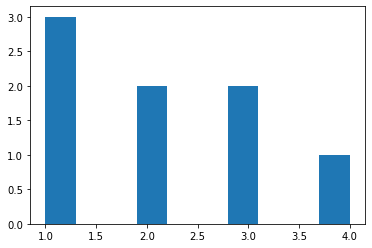

In [50]:
'''
example histogram
'''

data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [51]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <BarContainer object of 10 artists>)

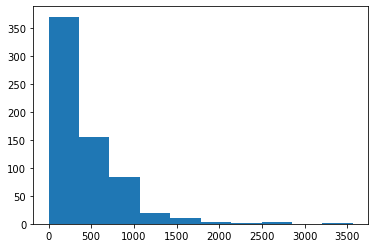

In [52]:
plt.hist(passing_minutes.values())

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <BarContainer object of 10 artists>)

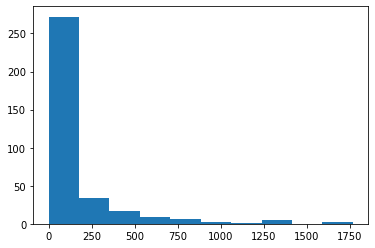

In [53]:
plt.hist(non_passing_minutes.values())

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

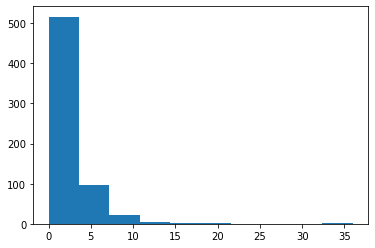

In [54]:
plt.hist(passing_lessons.values())

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

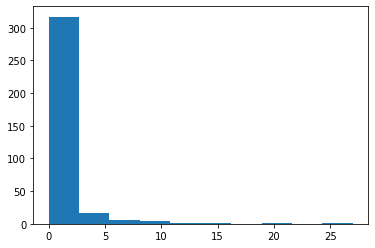

In [55]:
plt.hist(non_passing_lessons.values())

(array([207., 116., 186.,  85.,  37.,   6.,   5.,   2.,   1.,   2.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

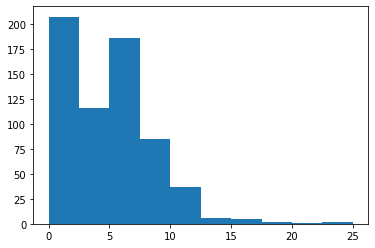

In [56]:
plt.hist(passing_visits.values())

(array([165.,  88.,  39.,  29.,  10.,  11.,   4.,   1.,   0.,   1.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

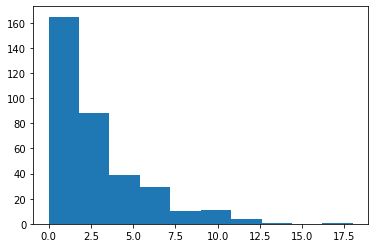

In [57]:
plt.hist(non_passing_visits.values())

Populating the interactive namespace from numpy and matplotlib
Mean: 306.7083267534287
Standard deviation: 413.2046261213701
Minimum: 0.0
Maximum: 3564.73326449893


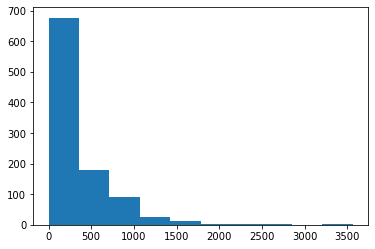

In [59]:
'''
instead of doing each histogram seperately it can be done i nthe describe data function like below
'''


import statistics as stat
import matplotlib.pyplot as plt
import numpy as np

%pylab inline

def describe_data(data): 
    print('Mean:', stat.mean(data))
    print('Standard deviation:', stat.stdev(data))
    print('Minimum:', min(data))
    print('Maximum:', max(data))
    plt.hist(data)
    
    
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)


## Improving Plots and Sharing Findings

Text(0, 0.5, 'Total Students')

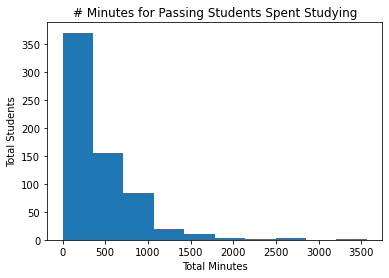

In [60]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

plt.title("# Minutes for Passing Students Spent Studying")
plt.hist(passing_minutes.values())
plt.xlabel("Total Minutes")
plt.ylabel("Total Students")

#plt.hist(non_passing_minutes.values())

Text(0, 0.5, 'Total Students')

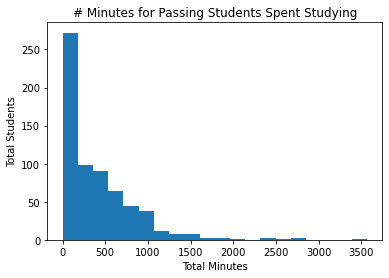

In [63]:
plt.title("# Minutes for Passing Students Spent Studying")
plt.hist(passing_minutes.values(), bins=20)
plt.xlabel("Total Minutes")
plt.ylabel("Total Students")

Text(0, 0.5, 'Total Students')

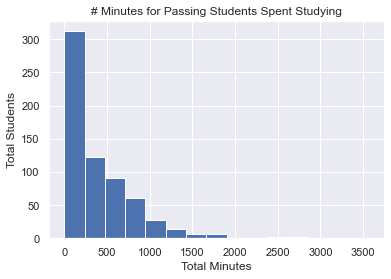

In [69]:
import seaborn as sns

sns.set()

plt.title("# Minutes for Passing Students Spent Studying")
plt.hist(passing_minutes.values(), bins=15)
plt.xlabel("Total Minutes")
plt.ylabel("Total Students")